In [3]:
import pandas as pd

df = pd.read_csv('/Users/jannajulianfeiten/Downloads/amz_uk_price_prediction_dataset_2.csv')

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories

Crosstab Analysis:

1. Create a crosstab between the product category and the isBestSeller status.

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [5]:
# Generating a crosstab for 'isBestSeller' and 'category'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [8]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result['prop_best_seller'] = crosstab_result[True] / (crosstab_result[False] + crosstab_result[True])

crosstab_result_sorted = crosstab_result.sort_values(by='prop_best_seller', ascending=False)

crosstab_result_sorted

isBestSeller,False,True,prop_best_seller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


Are there categories where being a best-seller is more prevalent?
Yes, like Grocery, Smart Home Security & Lighting and others.

2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

- Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables. 


In [9]:
from scipy.stats import chi2_contingency

# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value, expected_freq

(np.float64(36684.23786636857),
 np.float64(0.0),
 array([[2.47193964e+02, 8.09882713e-01, 1.85076756e-04],
        [4.05371625e+03, 1.32812090e+01, 3.03506057e-03],
        [2.49203347e+02, 8.16466063e-01, 1.86581203e-04],
        [1.69145759e+03, 5.54173022e+00, 1.26641233e-03],
        [2.53182120e+02, 8.29501733e-01, 1.89560152e-04],
        [8.50215078e+03, 2.78556353e+01, 6.36565092e-03],
        [1.06659816e+02, 3.49450041e-01, 7.98573411e-05],
        [2.57176598e+02, 8.42588862e-01, 1.92550861e-04],
        [9.51783364e+03, 3.11833217e+01, 7.12610350e-03],
        [1.50008640e+04, 4.91473992e+01, 1.12313068e-02],
        [9.32544259e+03, 3.05529901e+01, 6.98205827e-03],
        [2.38244365e+02, 7.80561099e-01, 1.78376096e-04],
        [3.22941764e+03, 1.05805557e+01, 2.41789941e-03],
        [9.44704154e+03, 3.09513853e+01, 7.07310070e-03],
        [6.68808280e+03, 2.19121962e+01, 5.00743888e-03],
        [5.26284806e+02, 1.72426931e+00, 3.94035044e-04],
        [1.90296406e+0

Compute Cramér's V to understand the strength of association between best-seller status and category.
Cramer's V is a measure of association used to quantify the strength of the relationship between categorical variables.
Interpretation: Cramer's V ranges from 0 to 1, where 0 indicates no association, and 1 represents a perfect association between the variables. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

In [12]:
df['isBestSeller_int'] = df['isBestSeller'].map({False: 0, True: 1})  # ou {"No":0, "Yes":1}
crosstab_result = pd.crosstab(df['category'], df['isBestSeller_int'])
association(crosstab_result, method="cramer")

0.1222829439760564

3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

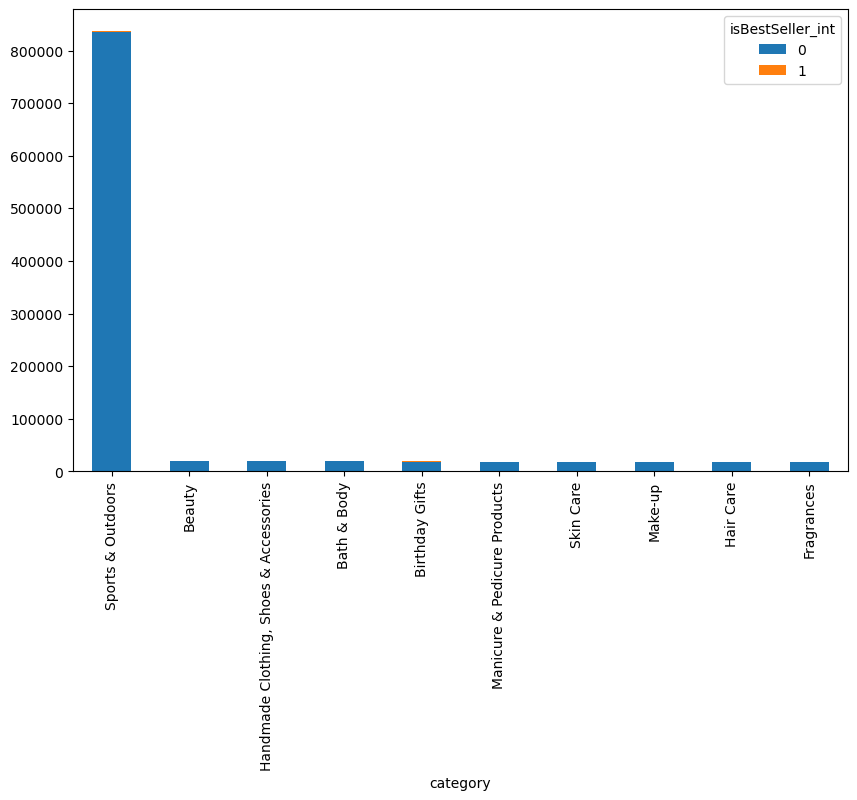

In [18]:
top_categories = crosstab_result.sum(axis=1).sort_values(ascending=False).head(10).index

crosstab_result.loc[top_categories].plot(kind="bar", stacked=True, figsize=(10,6))

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [19]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

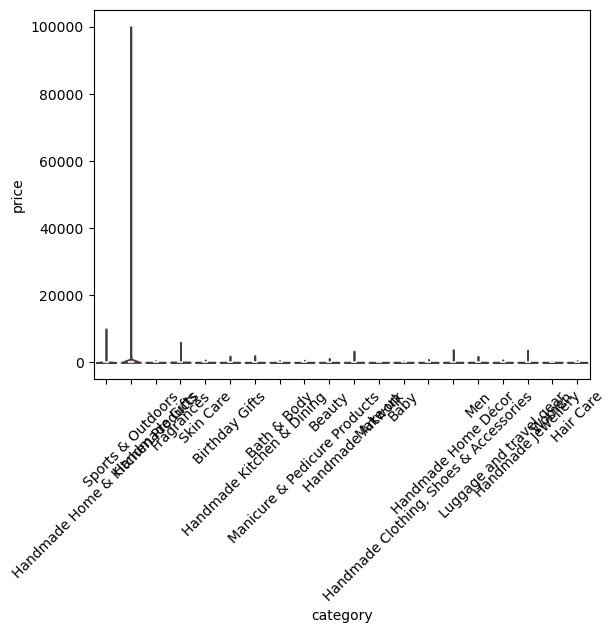

category
Laptops    1042.725
Name: price, dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

top_categories = df['category'].value_counts().head(20).index
df_top20 = df[df['category'].isin(top_categories)]

sns.violinplot(data=df_top20, x='category', y='price', hue='category', legend=False)
plt.xticks(rotation=45)
plt.show()


median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)

median_prices.head(1)


2. Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [ ]:
data_series = df['ColumnName']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
